<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Why Python for Finance?

## Zen of Python

In [3]:
import this

## The Python Ecosystem

In [2]:
100 * 2.5 + 50

300.0

In [3]:
# causes intentional error
# log(1)  

In [4]:
import math  

In [5]:
math.log(1)  

0.0

## Finance and Python Syntax

In [6]:
import math
import numpy as np  

In [7]:
S0 = 100.  
K = 105.
T = 1.0  
r = 0.05  
sigma = 0.2  

In [8]:
I = 100000  

In [9]:
np.random.seed(1000)  

In [10]:
z = np.random.standard_normal(I)  

In [11]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

In [12]:
hT = np.maximum(ST - K, 0)  

In [13]:
C0 = math.exp(-r * T) * np.mean(hT)  

In [14]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [15]:
%run bsm_mcs_euro.py  #加载进当前文档

Value of the European call option 7.989.


In [7]:
# %load bsm_mcs_euro.py
#
# Monte Carlo valuation of European call option
# in Black-Scholes-Merton model
# bsm_mcs_euro.py
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import math
import numpy as np

# Parameter Values
S0 = 100.  # initial index level
K = 105.  # strike price
T = 1.0  # time-to-maturity
r = 0.05  # riskless short rate
sigma = 0.2  # volatility

I = 100000  # number of simulations

# Valuation Algorithm
z = np.random.standard_normal(I)  # pseudo-random numbers
# index values at maturity
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)  # payoff at maturity
C0 = math.exp(-r * T) * np.mean(hT)  # Monte Carlo estimator

# Result Output
print('Value of the European call option %5.3f.' % C0)


Value of the European call option 8.010.


## Time-to-Results

In [79]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [81]:
plt.style.use('seaborn-v0_8')  
mpl.rcParams['font.family'] = 'serif'  
%config InlineBackend.figure_format = 'svg'

In [21]:
data = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)  


In [23]:
data = data[['.SPX']]
data

,.SPX
Date,
2010-01-01,NaN
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
...,...
2018-06-25,2717.07
2018-06-26,2723.06
2018-06-27,2699.63


In [25]:
data = pd.DataFrame(data['.SPX']) 
data.dropna(inplace=True)  
data.info()  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


In [19]:
data['rets'] = np.log(data / data.shift(1))   #连续时间的报酬 
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)  

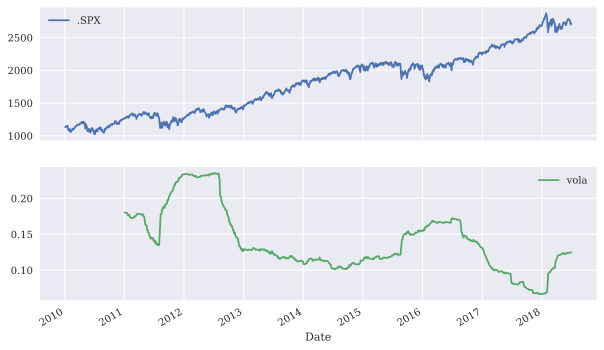

In [20]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  

## Idioms & Paradigms

In [21]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

576 ms ± 5.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

26 ms ± 988 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

25.5 ms ± 480 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

7.25 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a license for Eikon. Therefore no code is provided.**

### AI-First Finance 

In [27]:
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [31]:
lags = 6

In [33]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)
data.dropna(inplace=True)

In [35]:
from sklearn.svm import SVC

In [37]:
model = SVC(gamma='scale')  

In [39]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC()

In [41]:
data['Prediction'] = model.predict(data[cols])  

In [43]:
data['Strategy'] = data['Prediction'] * data['Returns']  

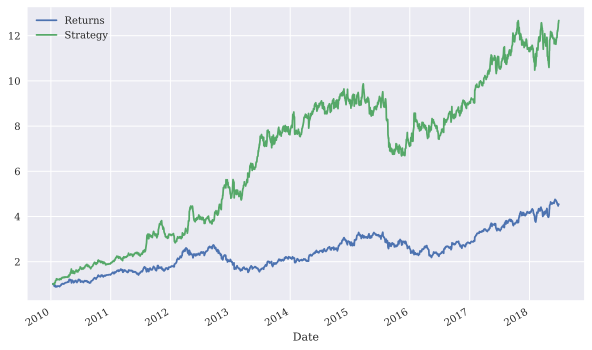

In [45]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  

In [58]:
#先删去NA再计算return
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O']) 

In [59]:
data.dropna(inplace = True)

In [62]:
data["Return"] = np.log(data["AAPL.O"]/data['AAPL.O'].shift())

In [66]:
lags = 6
cols = []
for i in range(1, lags+1):
    col = 'lag_{}'.format(i)
    data[col] = np.sign(data['Return'].shift(i))
    cols.append(col)
data.dropna(inplace=True)

In [70]:
# 训练SVM模型
from sklearn.svm import SVC
model = SVC(gamma="scale")
model.fit(data[cols], np.sign(data['Return']))


SVC()

In [74]:
data['Prediction'] = model.predict(data[cols])

In [77]:
data['Stra'] = data['Return']*data['Prediction']

<Axes: xlabel='Date'>

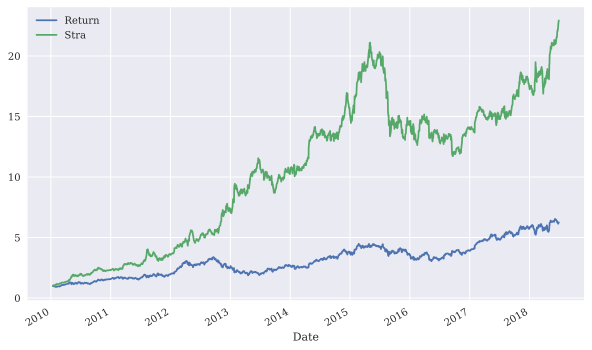

In [85]:
data[['Return','Stra']].cumsum().apply(np.exp).plot(figsize = (10, 6))